In [11]:
# Treinar modelos
# REGRESSÃO LINEAR
# Analise da equação normal

In [12]:
import numpy as np


In [13]:
# objetivo: encontrar um theta que minimiza a função de custo(MSE(X, h(theta)))
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [14]:
# Calculo de theta chapeu 
X_b = np.c_[np.ones((100,1)),X] # adiciona x0 = 1 em cada instancia
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
theta_best

array([[4.10177208],
       [2.98108427]])

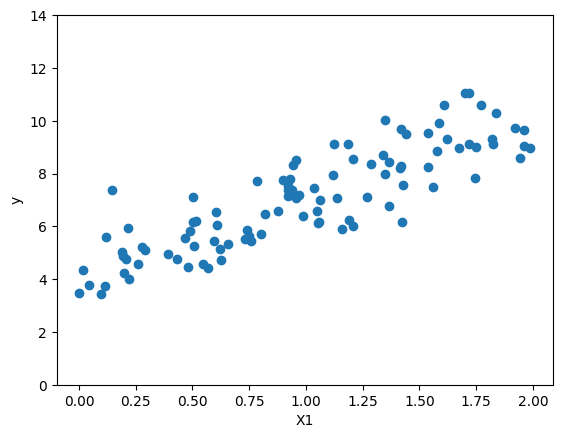

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X , y)
plt.ylabel('y')
plt.xlabel('X1')
plt.ylim(0,14)
plt.show()

In [17]:
# agora utilizando o theta chapeu
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # adiciona x0 = 1 pra cada instancia
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.10177208],
       [10.06394061]])

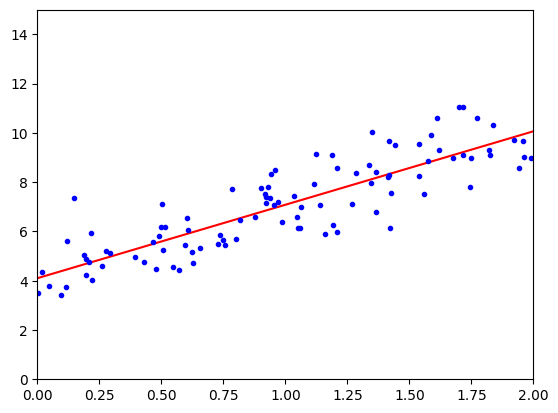

In [18]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [19]:
# usando o sklearn
from sklearn.linear_model import LinearRegression

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.10177208]), array([[2.98108427]]))

In [21]:
lin_reg.predict(X_new)

array([[ 4.10177208],
       [10.06394061]])

In [22]:
# Pode-se chamar diretamente os parametros 
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b , y, rcond = 1e-6)
theta_best_svd

array([[4.10177208],
       [2.98108427]])

In [23]:
# basicamente a função acima calcula o theta chapeu usando o X^+(pseudoinversa de Moore-Penrose)
np.linalg.pinv(X_b).dot(y)

array([[4.10177208],
       [2.98108427]])

In [24]:
# GRADIENT DESCENT
# Algoritmo que visa minimizar uma funçao de custo de forma iterativa.
# tipos, batch(em lote), estocástico, mini-batch
# Batch Gradient Descent:

# Descrição: Neste método, o conjunto de dados completo (o lote inteiro) é utilizado para calcular 
# o gradiente da função de custo em relação aos parâmetros do modelo.
# Vantagens:
# Pode convergir para a solução global em problemas convexos.
# A atualização dos parâmetros é mais estável devido à média de todo o conjunto de dados.
# Desvantagens:
# Requer que o conjunto de dados caiba na memória, o que pode ser um problema para conjuntos de dados muito grandes.
# Pode ser computacionalmente caro em termos de tempo.
# Stochastic Gradient Descent (SGD):

# Descrição: Em contraste com o Batch Gradient Descent, o SGD utiliza apenas uma instância 
#de treinamento aleatória para calcular o gradiente em cada iteração.
# Vantagens:
# Eficiente para grandes conjuntos de dados, pois apenas uma amostra é utilizada em cada iteração.
# Pode ser mais rápido para atingir uma solução aproximada.
# Desvantagens:
# A variação nas atualizações dos parâmetros pode tornar a convergência mais oscilante.
# Pode ser menos eficiente quando a função de custo tem muitos mínimos locais.
# Mini-Batch Gradient Descent:

# Descrição: Este método combina características do Batch e do SGD, utilizando um pequeno lote de dados 
# para calcular o gradiente em cada iteração.
# Vantagens:
# Combina eficiência computacional do SGD com a estabilidade do Batch Gradient Descent.
# Adequado para conjuntos de dados de tamanho moderado.
# Desvantagens:
# Ainda é necessário definir o tamanho do mini-batch, o que pode exigir ajuste.

In [25]:
# GRADIENT DESCENT
# implementação

eta = 0.1
n_interations = 1000
theta = np.random.randn(2,1)
m =100

for iteration in range(n_interations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta *gradients

In [26]:
theta

array([[4.10177208],
       [2.98108427]])

In [27]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [28]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

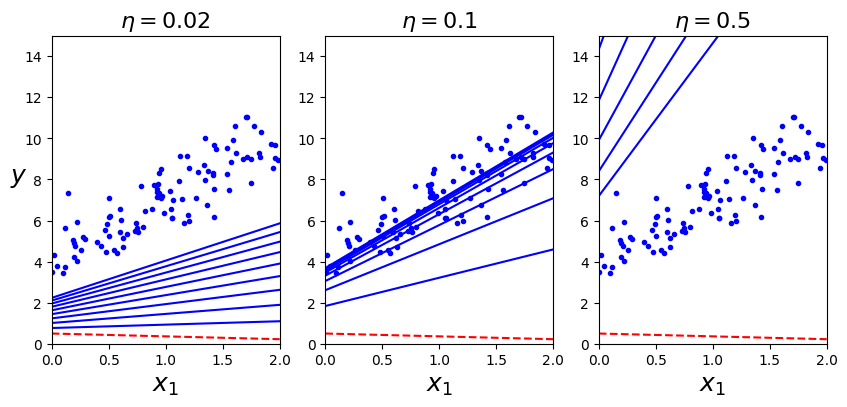

In [29]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

# save_fig("gradient_descent_plot")
plt.show()

In [30]:
theta

array([[ 0.49671415],
       [-0.1382643 ]])

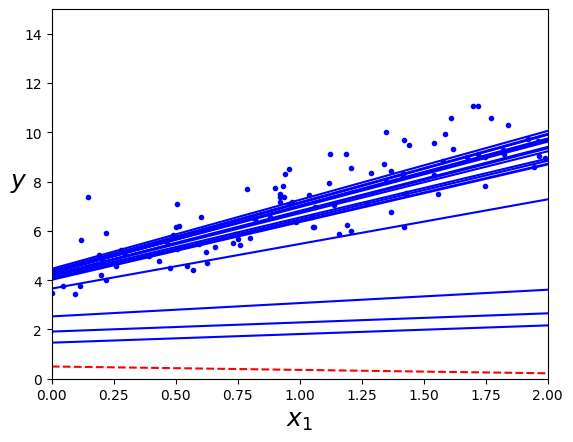

In [31]:
# Gradient Descent estocastico
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
# save_fig("sgd_plot")                                 # not shown
plt.show()  

In [32]:
theta

array([[4.05327626],
       [2.97643975]])

In [33]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [34]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.09510323]), array([2.99844992]))

In [35]:
# Mini Batch
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [36]:
theta

array([[4.15894014],
       [3.02701215]])

In [37]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

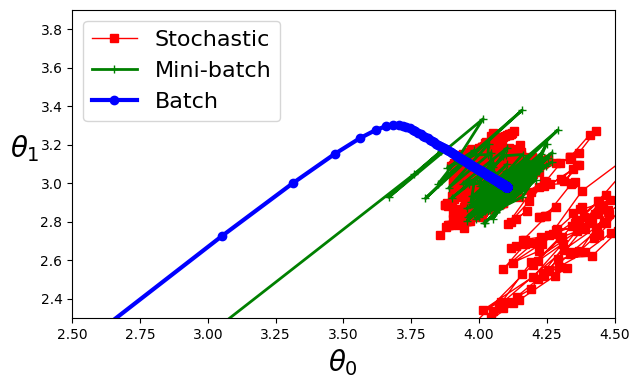

In [38]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
# save_fig("gradient_descent_paths_plot")
plt.show()

In [39]:
# Regressão Polinomial
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


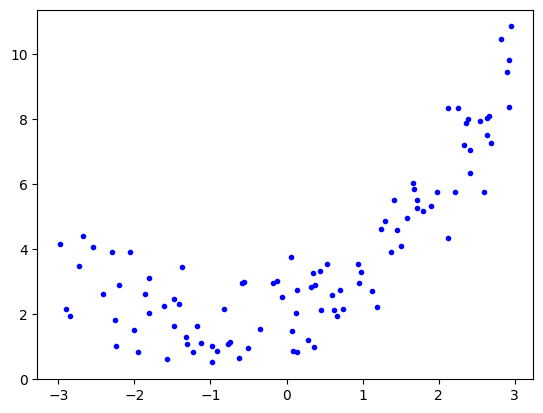

In [40]:
plt.plot(X,y, 'b.')
# plt.axis([0,2,0,15])
plt.show()

In [41]:
# Reta não faz sentido nesse caso
# Vamos usar o PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [42]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

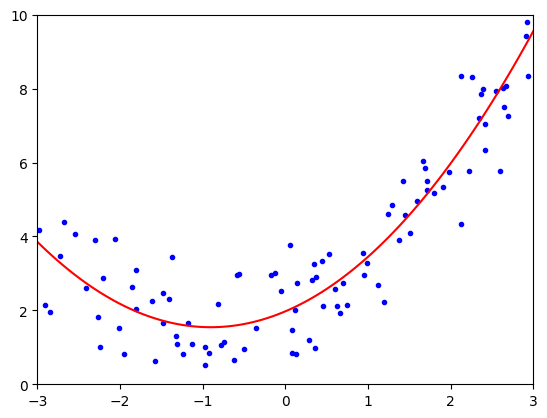

In [44]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-")
plt.axis([-3, 3, 0, 10])
plt.show()

In [45]:
# Curvas de Aprendizado 
# importante, como saber se o modelo está sobreajustado ou subajustado ?
# A validação cruzada é uma forma de verificar isso, se o modelo tiver um bom desempenho nos dados de treinamento 
# e deixar a desejar na generalização de acordo com as metricas de validação cruzada, então ele está se sobreajustando
# caso o desempenho deixe a desejar em ambos, estará se subajustando.

# A outra forma são as curvas de aprendizado:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

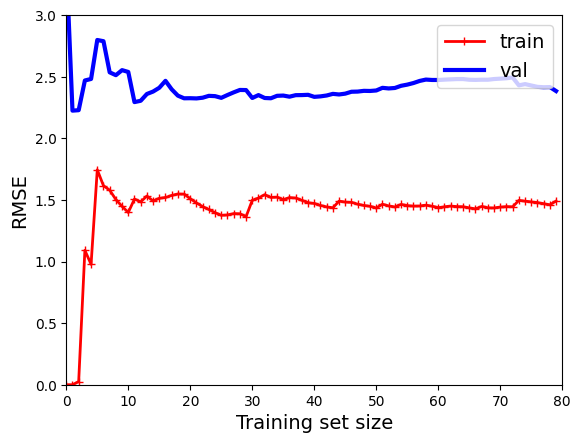

In [46]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()         

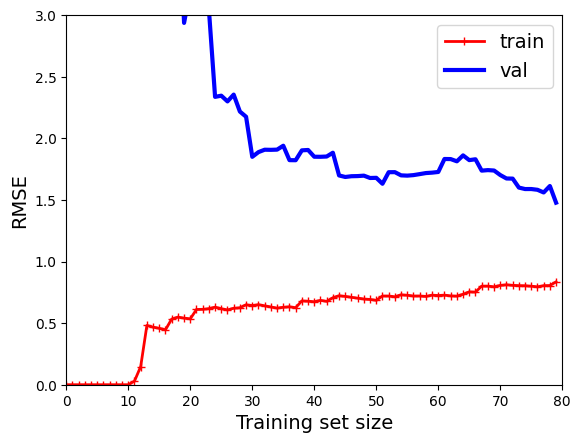

In [47]:
# analise de curvas de aprendizado de outro polinomio
from sklearn.pipeline import  Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

In [48]:
# erros nos dados de treinamento é bem menor do que no modelo de regressão linear
# A lacuna entre as curvas indica que o modelo tem um desempenho melhor nos dados de treinamento do que na validação
# ou sejam sobreajuste. Uma forma de melhorar um modelo de sobreajuste é fornecer mais dados de treinamento até que o erro 
# de validação alcace o erro de treinamento.

In [54]:
# Regressão de Ridge
# versaõ regularizada da regressão linear
# uma forma de regularizar um modelo é adicionar um termo de regularização a função de custo do modelo
# para a regressão de ridge, o termo de regularização é simplesmente uma norma l2 do vetor de peso
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [50]:
sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.10859029])

In [51]:
# Regressão de Lasso
# outra forma de regularizar um modelo é adicionar um termo de regularização a função de custo do modelo
# para a regressão de lasso, o termo de regularização é simplesmente uma norma l1 do vetor de peso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([5.09481859])

In [56]:
# Elastic Net
# é uma mistura da regressão de ridge e lasso
# a regularização l1 leva a zeros alguns pesos, enquanto a regularização l2 tende a reduzir os pesos


# OBS: Quase sempre é preferivel ter pelo menos um pouco de regularização, então deve-se evitar o modelo de regressão linear simples
# a regressão de ridge é um bom padrão, mas se suspeitar que apenas algumas das variaveis são realmente importantes, 
# deve-se preferir a regressão de lasso ou elastic net
# pois elas tendem a reduzir os pesos das variaveis menos importantes a zero. Usualmente a elastic net é preferivel a lasso
# pois lasso pode se comportar de forma erratica quando o numero de variaveis é maior que o numero de instancias de treinamento

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])


array([4.78114505])

In [66]:
# Early Stopping
# uma forma de regularizar iterativamente os modelos de aprendizado iterativo como o gradient descent é parar o treinamento
# quando o erro de validação atinge um minimo, então o modelo de regressão de gradient descent irá parar automaticamente
# quando o erro de validação parar de diminuir e começar a aumentar novamente 
# OBS: com o SGD e mini-batch gradient descent, a curva de aprendizado não é suave, e pode ser dificil saber se o modelo está
# sobreajustando ou não. Uma solução simples é parar o treinamento assim que o erro de validação atingir um minimo, e depois
# voltar alguns passos para trás.

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Prepare the data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Execute the stochastic gradient descent regression model, starting with the best hyperparameters found
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
# The warm_start=True allows the training to continue from the previous state

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
    else:
        # If validation error starts increasing, stop training
        break

# At this point, best_model contains the model with the minimum validation error


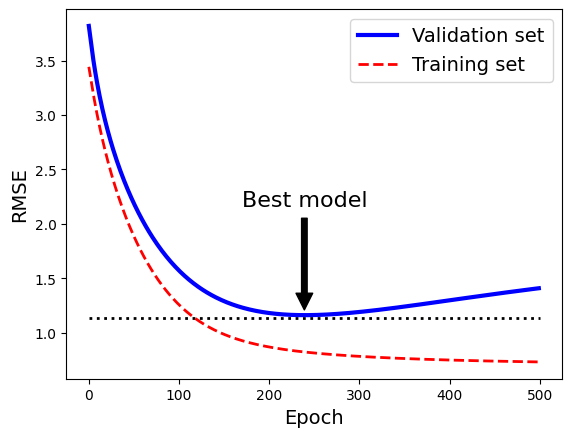

In [67]:
# Criando grafico 
sgd_reg = SGDRegressor(max_iter=1, tol= None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
# save_fig("early_stopping_plot")
plt.show()

In [68]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=None, warm_start=True))

In [69]:
# fronteira de decisão
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [75]:
X = iris["data"][:,3:] # largura da petala
y = (iris["target"] == 2).astype(np.int32) # 1 se Iris-Virginica, senão 0

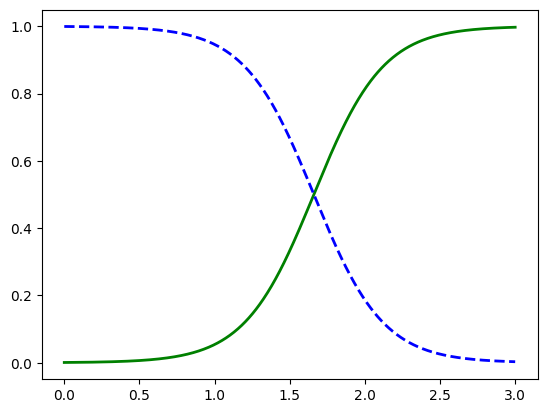

In [78]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")



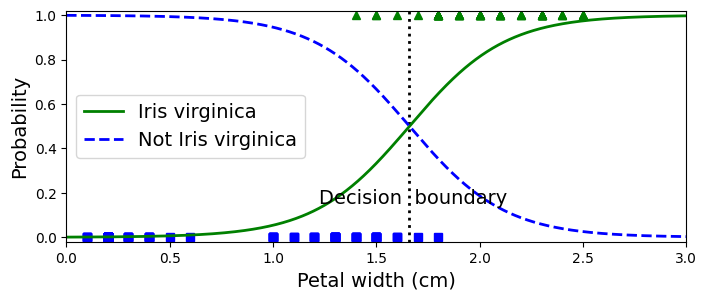

In [84]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
# plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
# plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
# save_fig("logistic_regression_plot")
plt.show()

In [85]:
decision_boundary


array([1.66066066])

In [86]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

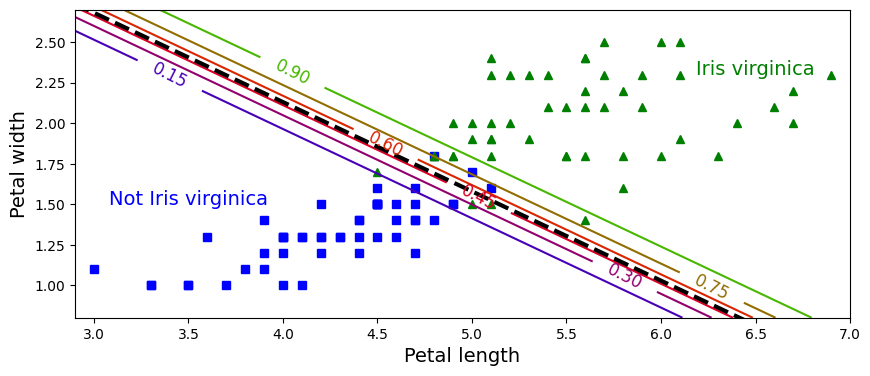

In [88]:
# Regressão Softmax    

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int32)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("logistic_regression_contour_plot")
plt.show()

In [90]:
zz

array([[1.64270002e-09, 1.72223501e-09, 1.80562087e-09, ...,
        9.63457284e-01, 9.65085953e-01, 9.66644546e-01],
       [1.81499854e-09, 1.90287575e-09, 1.99500774e-09, ...,
        9.66811166e-01, 9.68295275e-01, 9.69715097e-01],
       [2.00536901e-09, 2.10246343e-09, 2.20425890e-09, ...,
        9.69866857e-01, 9.71218391e-01, 9.72511025e-01],
       ...,
       [3.59514892e-01, 3.70472893e-01, 3.81565914e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.82789041e-01, 3.94020024e-01, 4.05364107e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.06613363e-01, 4.18069876e-01, 4.29615479e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [92]:
# aplicando o modelo
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [93]:
softmax_reg.predict([[5, 2]])

array([2])

In [94]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

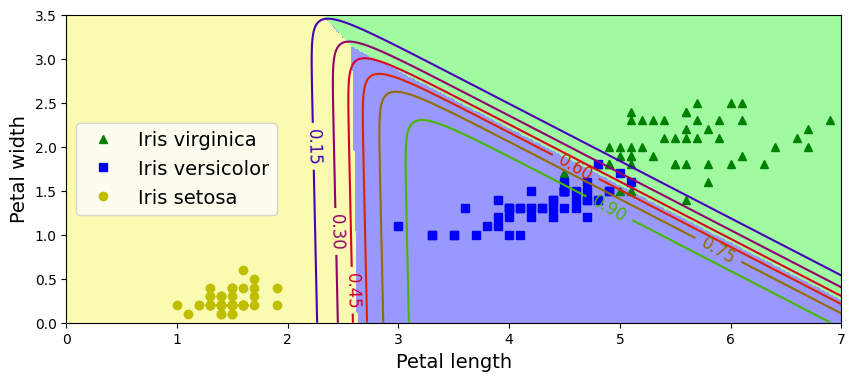

In [95]:
# Gráfico 
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
# save_fig("so
plt.show()